# Import Libraries & Insert Data

In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Superstore.csv", encoding='windows-1252', index_col='Row ID')


# Show Data

In [255]:
pd.options.display.max_columns = 22
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [256]:
df.shape

(9994, 20)

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 non-nu

In [258]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

# Missing Values

In [259]:
df.isna().sum().sum() # No Null Values

np.int64(0)

# Data Types

In [260]:
df['Order Date'] = df['Order Date'].astype('datetime64[ns]')
df['Ship Date'] = df['Ship Date'].astype('datetime64[ns]')

# Feature Engineering

In [261]:
df['order_year'] = df['Order Date'].dt.year
df['order_month'] = df['Order Date'].dt.month
df['margin'] = df['Profit'] / df['Sales']

# Visualization & Get Some KPIs

### Sales and profit per year

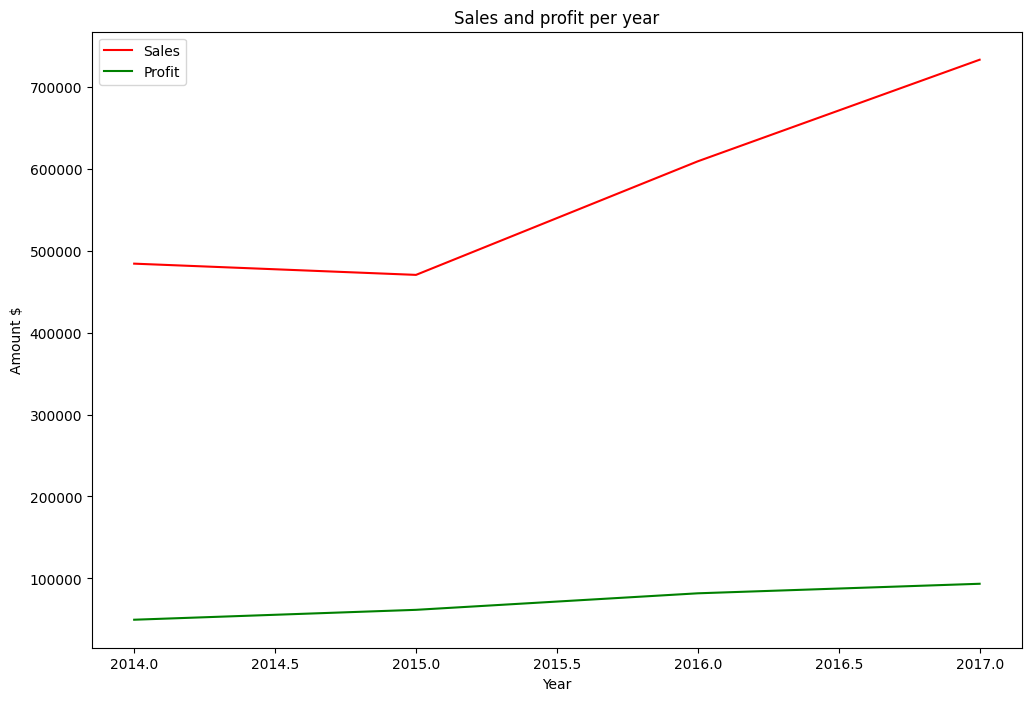

In [262]:
Yearly_sales = df.groupby('order_year')['Sales'].sum()
Yearly_profit = df.groupby('order_year')['Profit'].sum()
plt.figure(figsize=(12, 8))
plt.plot(Yearly_sales.index, Yearly_sales.values, label='Sales',color='r')
plt.plot(Yearly_profit.index, Yearly_profit.values, label='Profit', color='g')
plt.ylabel("Amount $")
plt.xlabel("Year")
plt.title("Sales and profit per year")
plt.legend()
plt.show()


### Sales per Month

Text(0, 0.5, 'Amount $')

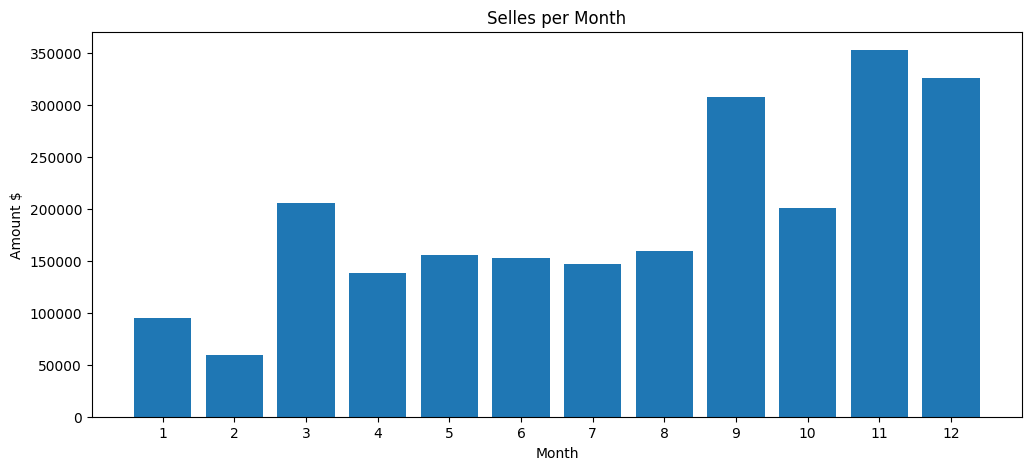

In [263]:
Monthly_sales = df.groupby('order_month')['Sales'].sum()
plt.figure(figsize=(12, 5))
plt.bar(Monthly_sales.index, Monthly_sales.values)
plt.xticks(range(1, 13))
plt.title("Selles per Month")
plt.xlabel("Month")
plt.ylabel("Amount $")

### Sales by Sub_Category

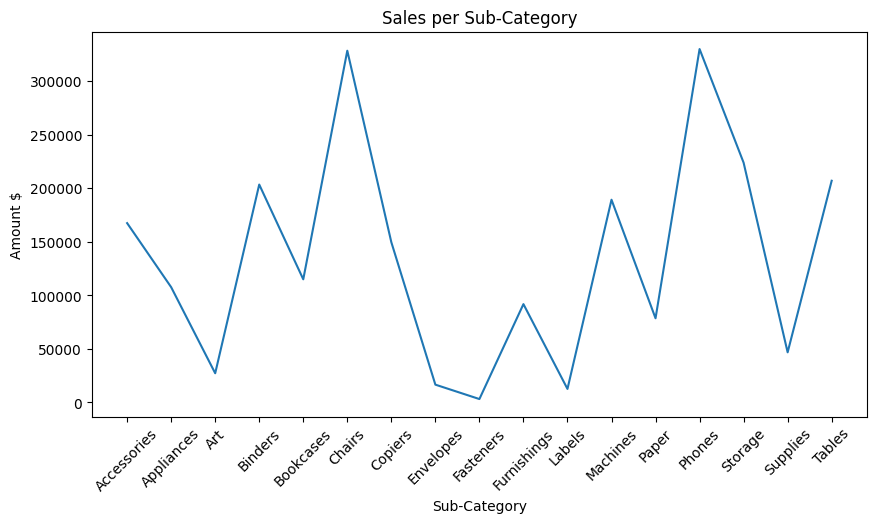

In [264]:
sub_category_sales = df.groupby('Sub-Category')['Sales'].sum()
plt.figure(figsize=(10, 5))
plt.plot(sub_category_sales.index, sub_category_sales.values)
plt.title("Sales per Sub-Category")
plt.xlabel("Sub-Category")
plt.xticks(rotation=45)
plt.ylabel("Amount $")
plt.show()

### Sales Distribution by Region

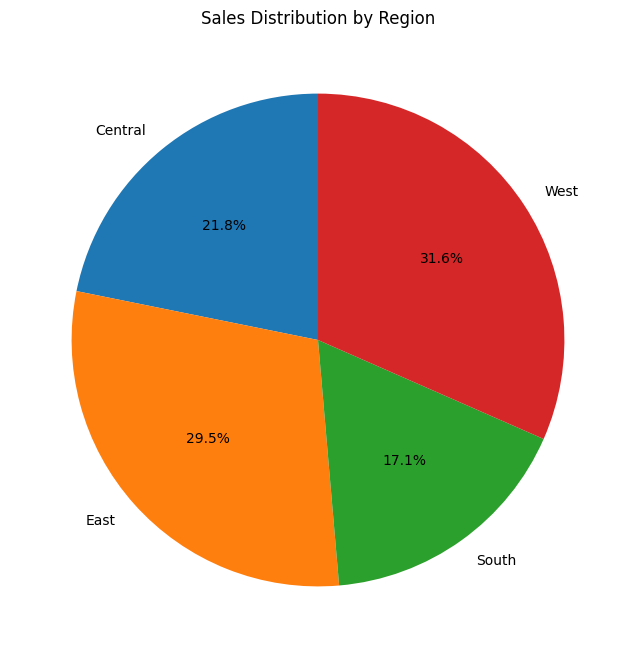

In [265]:
Region_sales = df.groupby('Region')['Sales'].sum()
plt.figure(figsize=(8, 8))
plt.pie(
    Region_sales.values, 
    labels=Region_sales.index, 
    autopct='%1.1f%%',
    startangle=90,
)
plt.title("Sales Distribution by Region")
plt.show()

### Impact of discounts and promotions on sales

Text(0, 0.5, 'Amount $')

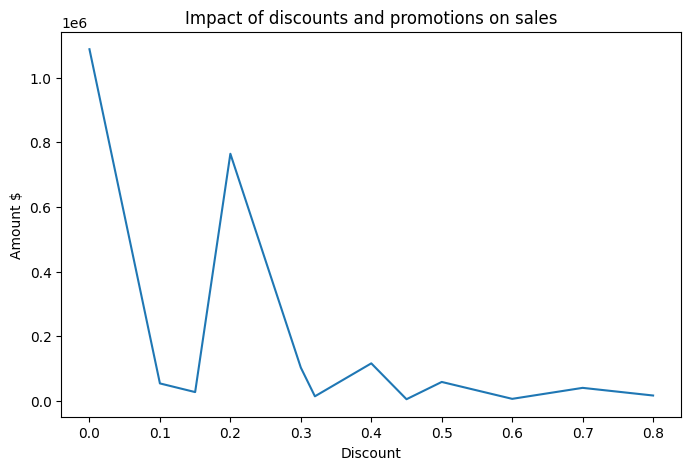

In [266]:
sales_per_Discount = df.groupby('Discount')['Sales'].sum()
plt.figure(figsize=(8, 5))
plt.plot(sales_per_Discount.index, sales_per_Discount.values)
plt.title("Impact of discounts and promotions on sales")
plt.xlabel("Discount")
plt.ylabel("Amount $")

### Average Profit Margin by Category

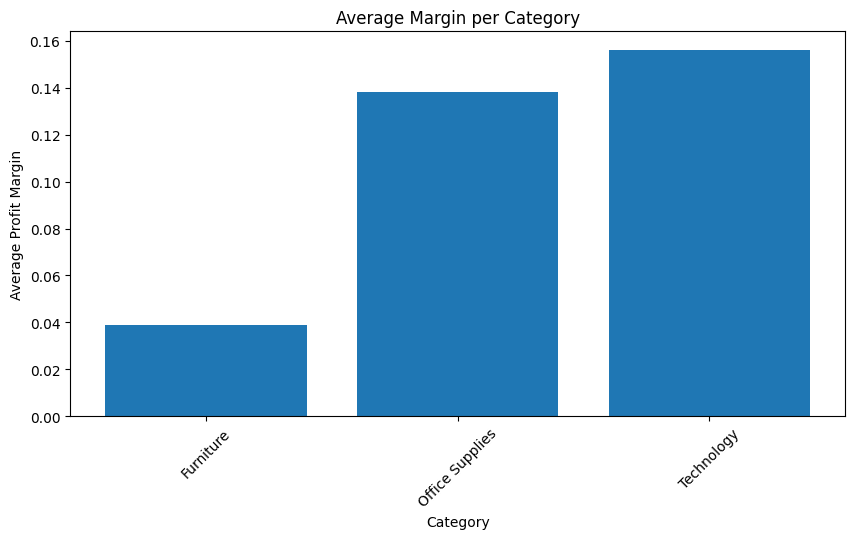

In [267]:
category_margin = df.groupby('Category')['margin'].mean()
plt.figure(figsize=(10, 5))
plt.bar(category_margin.index, category_margin.values)
plt.title("Average Margin per Category")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.ylabel("Average Profit Margin")
plt.show()

### Top 10 Selling Products

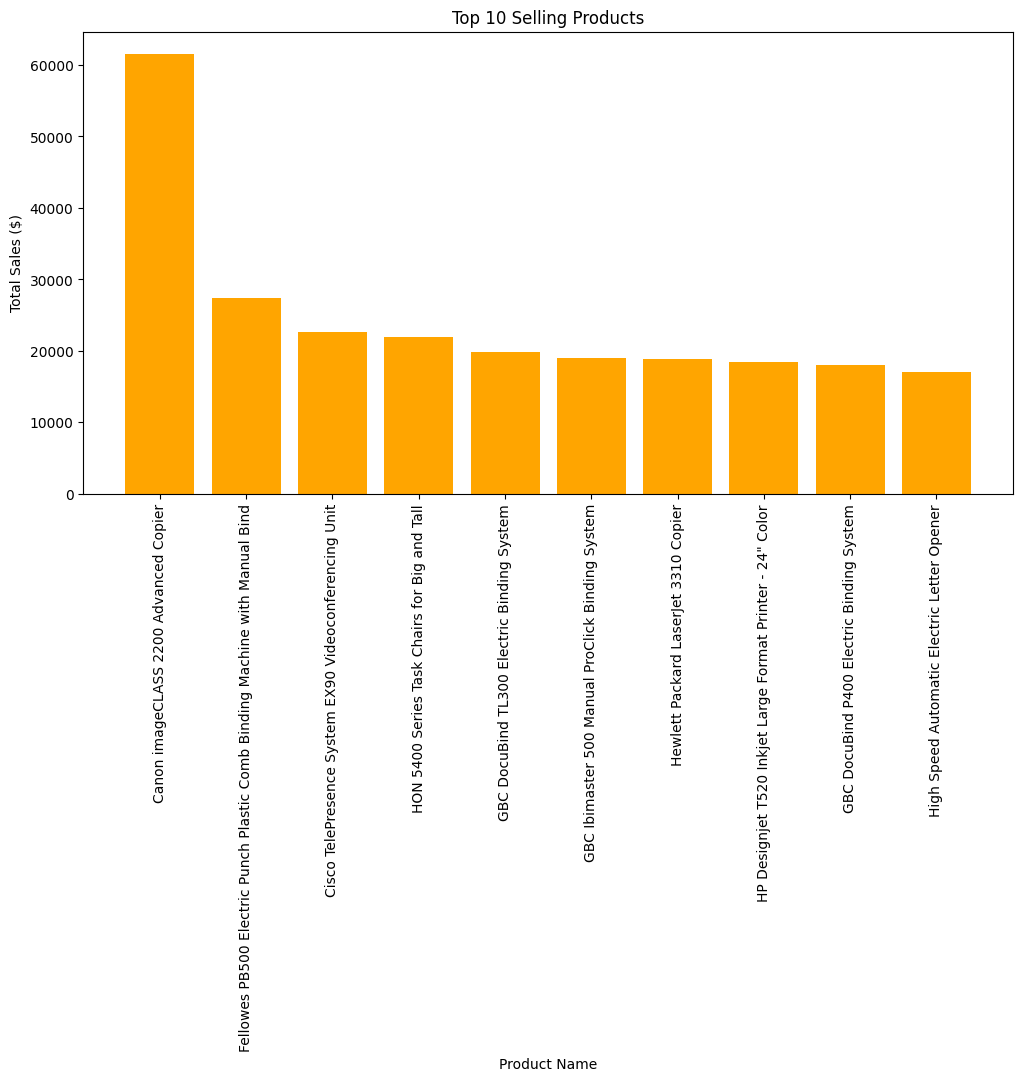

In [268]:
Top_selling_products = df.groupby('Product Name')['Sales'].sum()
top10 = Top_selling_products.sort_values(ascending=False).head(10)


plt.figure(figsize=(12,6))
plt.bar(top10.index, top10.values, color='orange')
plt.title("Top 10 Selling Products")
plt.xlabel("Product Name")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=90)
plt.show()

### Top 5 Sub-Categories by Sales

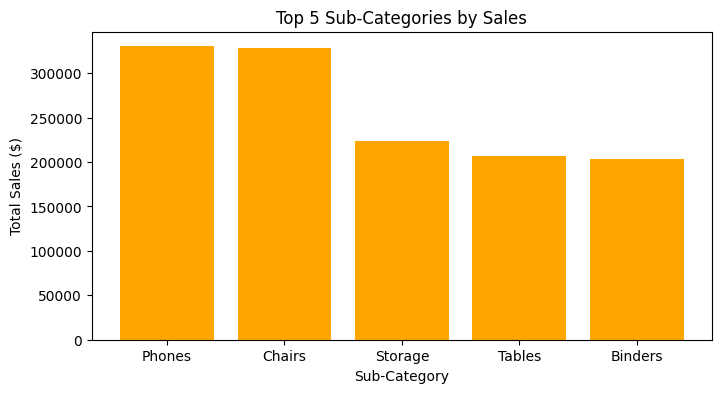

In [ ]:
top5_subcat = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,4))
plt.bar(top5_subcat.index, top5_subcat.values, color='orange')
plt.title("Top 5 Sub-Categories by Sales")
plt.xlabel("Sub-Category")
plt.ylabel("Total Sales ($)")
plt.show()